In [1]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2,RFECV

#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_curve,auc,fbeta_score

from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import BernoulliNB,MultinomialNB,CategoricalNB,GaussianNB,ComplementNB

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

import requests, zipfile, io
from datetime import date, timedelta

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

In [2]:
urlnew = "http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip"

# fecha_archivo = pd.Timestamp("today")
# fecha_archivo
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m%d%y')

archivo = yesterday.strftime("%y%m%d")+"COVID19MEXICO.csv"
archivo

'210918COVID19MEXICO.csv'

In [ ]:
#df = pd.read_csv(archivo,encoding='utf-8', low_memory=False)
#df = pd.read_csv(archivo,encoding='latin1', low_memory=False)
#df0 = pd.read_csv('200623COVID19MEXICO.csv',encoding='latin1', low_memory=False)
#df0 = pd.read_csv('200616COVID19MEXICO.csv',encoding='latin1', low_memory=False)

In [47]:
df0  = pd.read_csv('200806COVID19MEXICO.csv',
                   encoding='latin1', low_memory=False)

In [49]:
df = df0[(df0["RESULTADO"] == 1)]
df.shape

(462690, 35)

In [50]:
print(df['NEUMONIA'].unique())
print(df['DIABETES'].unique())
print(df['EPOC'].unique())
print(df['ASMA'].unique())
print(df['INMUSUPR'].unique())
print(df['CARDIOVASCULAR'].unique())
print(df['OBESIDAD'].unique())
print(df['RENAL_CRONICA'].unique())
print(df['TABAQUISMO'].unique())

[ 2  1 99]
[ 2  1 98]
[ 2  1 98]
[ 2  1 98]
[ 2  1 98]
[ 2  1 98]
[ 2  1 98]
[ 2 98  1]
[ 2  1 98]


In [51]:
df['FECHA_DEF'] = (df['FECHA_DEF'] == '9999-99-99').astype(int)
df       

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-06,0cfcc3,2,4,25,1,25,25,1,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-08-06,1d67f9,2,4,9,1,9,9,7,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-08-06,07d040,2,3,25,2,25,25,6,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
3,2020-08-06,17241d,2,3,27,1,27,27,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,2020-08-06,0276dd,2,4,9,1,9,9,7,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813243,2020-08-06,1980a4,1,4,32,1,32,32,17,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97
813244,2020-08-06,176de0,1,4,5,2,32,5,25,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
813245,2020-08-06,065899,2,4,5,1,5,5,33,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
813246,2020-08-06,131fc5,2,12,2,1,25,2,4,1,...,2,1,2,2,1,1,99,MÃ©xico,99,97


In [52]:
print(df['FECHA_DEF'].unique())
print(len(df[df['FECHA_DEF'] == 0] ) )
print(len(df[df['FECHA_DEF'] == 1] ) )

[1 0]
50517
412173


In [53]:
print(len(df[df['UCI'] == 1] ) )
print(len(df[ (df["UCI"] == 1) & (df["INTUBADO"] == 2 ) ] ) )

9935
4808


In [54]:
print(df['FECHA_DEF'].unique())
print(len(df[df['FECHA_DEF'] == 0] ) )
print(len(df[df['FECHA_DEF'] == 1] ) )

[1 0]
50517
412173


In [55]:
print(len(df[df["TIPO_PACIENTE"] == 1] ) )
print(len(df[ (df["TIPO_PACIENTE"] == 1) & (df["FECHA_DEF"] == 0 ) ] ) )

338693
5696


In [56]:
print(len(df[df["INTUBADO"] == 1] ) )
print(len(df[ (df["INTUBADO"] == 1) & (df["UCI"] == 2 ) ] ) )

11928
6801


In [60]:
#df = df0[(df0["RESULTADO"] == 3)]
#df.shape

In [35]:
print(len(df[df['UCI'] == 1] ) )
print(len(df[ (df["UCI"] == 1) & (df["INTUBADO"] == 2 ) ] ) )

1030
553


In [36]:
df = df0[(df0["RESULTADO"] == 2)]
df.shape

(233137, 35)

In [57]:
print(len(df[df['UCI'] == 1] ) )
print(len(df[ (df["UCI"] == 1) & (df["INTUBADO"] == 2 ) ] ) )

9935
4808


In [58]:
missing_neumonia       = df["NEUMONIA"].isin([99]).sum()
missing_diabetes       = df["DIABETES"].isin([98]).sum()
missing_epoc           = df["EPOC"].isin([98]).sum()
missing_asma           = df["ASMA"].isin([98]).sum()
missing_inmusupr       = df["INMUSUPR"].isin([98]).sum()
missing_hipertension   = df["HIPERTENSION"].isin([98]).sum()
missing_cardiovascular = df["CARDIOVASCULAR"].isin([98]).sum()
missing_obesidad       = df["OBESIDAD"].isin([98]).sum()
missing_renal_cronica  = df["RENAL_CRONICA"].isin([98]).sum()
missing_tabaquismo     = df["TABAQUISMO"].isin([98]).sum()
print(missing_neumonia)
print(missing_diabetes)
print(missing_epoc)
print(missing_asma)
print(missing_inmusupr)
print(missing_hipertension)
print(missing_cardiovascular)
print(missing_obesidad)
print(missing_renal_cronica)
print(missing_tabaquismo)


5
1485
1325
1319
1461
1400
1407
1365
1358
1461


In [59]:
pos_diabetes       = df["DIABETES"].isin([1]).sum()
pos_epoc           = df["EPOC"].isin([1]).sum()
pos_asma           = df["ASMA"].isin([1]).sum()
pos_inmusupr       = df["INMUSUPR"].isin([1]).sum()
pos_hipertension   = df["HIPERTENSION"].isin([1]).sum()
pos_cardiovascular = df["CARDIOVASCULAR"].isin([1]).sum()
pos_obesidad       = df["OBESIDAD"].isin([1]).sum()
pos_renal_cronica  = df["RENAL_CRONICA"].isin([1]).sum()
pos_tabaquismo     = df["TABAQUISMO"].isin([1]).sum()
print(pos_diabetes)
print(pos_epoc)
print(pos_asma)
print(pos_inmusupr)
print(pos_hipertension)
print(pos_cardiovascular)
print(pos_obesidad)
print(pos_renal_cronica)
print(pos_tabaquismo)

73771
7211
12346
5454
91464
9724
86729
9115
33317


In [61]:
clean_df=df.drop(df[ (df["NEUMONIA"] == 99) 
                    | (df["DIABETES"] == 98 ) | (df["HIPERTENSION"] == 98)
                    | (df["OBESIDAD"] == 98) | (df["TABAQUISMO"] == 98)
                   ].index)

In [62]:
missing_neumonia       = clean_df["NEUMONIA"].isin([99]).sum()
missing_diabetes       = clean_df["DIABETES"].isin([98]).sum()
missing_epoc           = clean_df["EPOC"].isin([98]).sum()
missing_asma           = clean_df["ASMA"].isin([98]).sum()
missing_inmusupr       = clean_df["INMUSUPR"].isin([98]).sum()
missing_hipertension   = clean_df["HIPERTENSION"].isin([98]).sum()
missing_cardiovascular = clean_df["CARDIOVASCULAR"].isin([98]).sum()
missing_obesidad       = clean_df["OBESIDAD"].isin([98]).sum()
missing_renal_cronica  = clean_df["RENAL_CRONICA"].isin([98]).sum()
missing_tabaquismo     = clean_df["TABAQUISMO"].isin([98]).sum()
print(missing_neumonia)
print(missing_diabetes)
print(missing_epoc)
print(missing_asma)
print(missing_inmusupr)
print(missing_hipertension)
print(missing_cardiovascular)
print(missing_obesidad)
print(missing_renal_cronica)
print(missing_tabaquismo)

0
0
76
56
180
0
115
0
76
0


In [63]:
clean_df.rename(columns={'FECHA_DEF':'SURVIVED'}, inplace=True)

In [64]:
print(clean_df['SURVIVED'].unique())
print(len(clean_df[clean_df['SURVIVED'] == 0] ) )
print(len(clean_df[clean_df['SURVIVED'] == 1] ) )

[1 0]
50051
410554


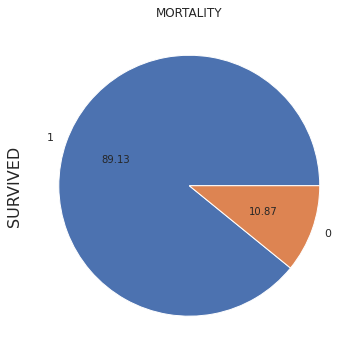

In [65]:
plot = clean_df['SURVIVED'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='MORTALITY')

In [66]:
cormob_df=clean_df[["HIPERTENSION", "OBESIDAD","DIABETES","TABAQUISMO","SURVIVED"]]
cormob_df

,HIPERTENSION,OBESIDAD,DIABETES,TABAQUISMO,SURVIVED
0,2,2,2,2,1
1,2,2,2,2,1
2,1,2,2,2,1
3,2,2,2,2,1
4,2,2,2,2,1
...,...,...,...,...,...
813243,1,1,2,2,1
813244,2,2,2,1,1
813245,2,2,2,2,1
813246,2,1,2,2,1


In [67]:
cormob_df.replace(to_replace = 2, value = 0, inplace = True)
cormob_df

,HIPERTENSION,OBESIDAD,DIABETES,TABAQUISMO,SURVIVED
0,0,0,0,0,1
1,0,0,0,0,1
2,1,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
813243,1,1,0,0,1
813244,0,0,0,1,1
813245,0,0,0,0,1
813246,0,1,0,0,1


In [68]:
print(clean_df['SURVIVED'].unique())
print(len(clean_df[clean_df['SURVIVED'] == 0] ) )
print(len(clean_df[clean_df['SURVIVED'] == 1] ) )

[1 0]
50051
410554


<AxesSubplot:>

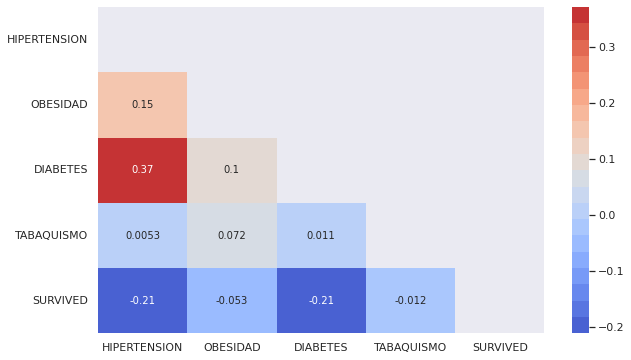

In [69]:
corr_mtx=cormob_df.corr(method='spearman')
mask_ut=np.triu(np.ones(corr_mtx.shape)).astype(np.bool)
sns.heatmap(corr_mtx,
            mask=mask_ut,
            annot=True,              
            cmap=sns.color_palette("coolwarm", 20))

In [70]:
X0 = cormob_df["HIPERTENSION"]
X1 = cormob_df["DIABETES"]
#X = cormob_df["DIABETES"]
y = cormob_df['SURVIVED']
#contingency_table_diab = pd.crosstab(X,y )
contingency_table = pd.crosstab([X0,X1],y ).apply(lambda r: r/r.sum(), axis=1)
contingency_table


SURVIVED                      0         1
HIPERTENSION DIABETES                    
0            0         0.062613  0.937387
             1         0.206847  0.793153
1            0         0.193639  0.806361
             1         0.303535  0.696465

<AxesSubplot:>

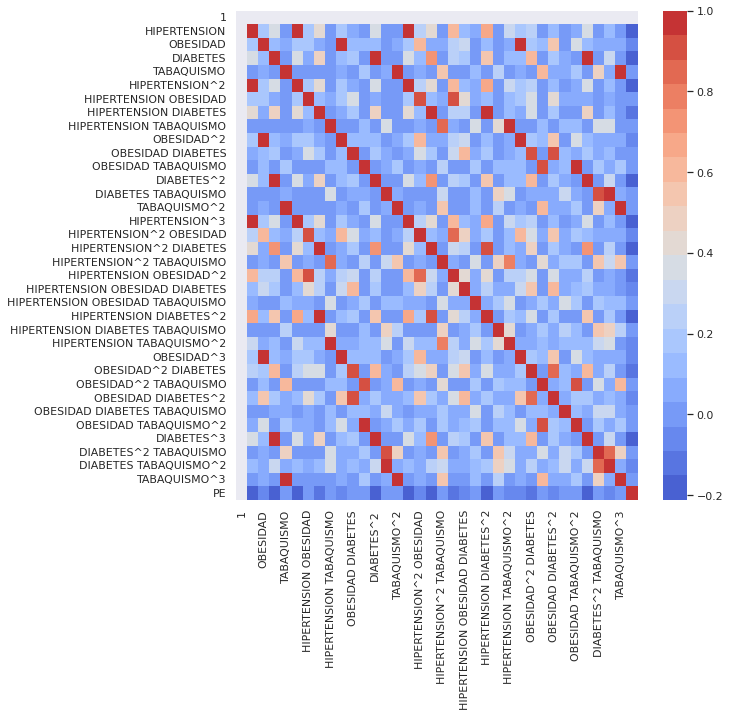

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

std_scl = StandardScaler()
poly = PolynomialFeatures(3)

X = cormob_df.iloc[:,0:4]
y = cormob_df['SURVIVED']

# X_train, X_test, y_train, y_test = train_test_split(X_ccpp, y_ccpp, 
#                                                     test_size=0.2, 
#                                                     random_state=1)

#Standardize X_train into X_train_scl
X_train_scl = std_scl.fit_transform(X) #Standardize and assign it to a variable

#Construct a DataFrame with column names
X_train_scl_df = pd.DataFrame(X_train_scl, 
                              index=X.index, 
                              columns=X.columns)

#Create PolynomialFeatures -> get their names
p_model     = poly.fit(X_train_scl_df)
poly_names  = p_model.get_feature_names(X_train_scl_df.columns)

#Transform X_train_scl into X_train_poly where polynomial features are stored
X_train_poly    = poly.fit_transform(X_train_scl_df)
X_train_poly_df = pd.DataFrame(X_train_poly, 
                              index=X.index, 
                              columns= poly_names)

#Create the full Train_df which is the matrix composed by Xy
all_names = np.concatenate((X_train_poly_df.columns, 'PE'), axis=None)
Train_ndarray = np.hstack([X_train_poly_df, y[:, np.newaxis]])
Train_df = pd.DataFrame(Train_ndarray, 
                              index=X.index, 
                              columns = all_names)

# Compute the correlation matrix
corr_mtx = Train_df.corr()
# corr_mtx = Train_df.corr('spearman')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_mtx, dtype=np.bool))

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_mtx, 
            # mask=mask, 
            cmap=sns.color_palette("coolwarm", 20))
# sns.heatmap(corr_mtx,ax=ax, cmap ="YlGnBu", linewidths = 0.1,)



In [72]:
print(corr_mtx.iloc[1:35,-1].abs()>0.15)

HIPERTENSION                         True
OBESIDAD                            False
DIABETES                             True
TABAQUISMO                          False
HIPERTENSION^2                       True
HIPERTENSION OBESIDAD               False
HIPERTENSION DIABETES               False
HIPERTENSION TABAQUISMO             False
OBESIDAD^2                          False
OBESIDAD DIABETES                   False
OBESIDAD TABAQUISMO                 False
DIABETES^2                           True
DIABETES TABAQUISMO                 False
TABAQUISMO^2                        False
HIPERTENSION^3                       True
HIPERTENSION^2 OBESIDAD             False
HIPERTENSION^2 DIABETES              True
HIPERTENSION^2 TABAQUISMO           False
HIPERTENSION OBESIDAD^2             False
HIPERTENSION OBESIDAD DIABETES      False
HIPERTENSION OBESIDAD TABAQUISMO    False
HIPERTENSION DIABETES^2              True
HIPERTENSION DIABETES TABAQUISMO    False
HIPERTENSION TABAQUISMO^2         

In [73]:
X = cormob_df[["HIPERTENSION", "DIABETES"]]
y = cormob_df['SURVIVED']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [74]:
X_test

,HIPERTENSION,DIABETES
144808,0,0
157523,0,0
166532,1,1
803317,0,0
211880,0,0
...,...,...
170132,0,0
232882,0,0
636759,0,0
709893,0,0


In [75]:
y

0         1
1         1
2         1
3         1
4         1
         ..
813243    1
813244    1
813245    1
813246    1
813247    1
Name: SURVIVED, Length: 460605, dtype: int64

In [76]:
print(type(y_train))
#print(y_test.unique())
print(len(y_train ) )
print(len(y_train[y_train == 0]  ) )
print(len(y_train[y_train == 1]  ) )

<class 'pandas.core.series.Series'>
322423
34922
287501


In [77]:
print(type(y_test))
#print(y_test.unique())
print(len(y_test ) )
print(len(y_test[y_test == 0]  ) )
print(len(y_test[y_test == 1]  ) )

<class 'pandas.core.series.Series'>
138182
15129
123053


In [78]:
#--------
### CREATE PIPELINES
no_poly = 1
no_sel_fts = 2

sclr_01 = MinMaxScaler()
std_sclr = StandardScaler()

polyFt_m = PolynomialFeatures(no_poly,include_bias=False)
#polyFt_m = PolynomialFeatures(no_poly)

### Initialize Ft Selection
sel = SelectKBest(chi2, k=no_sel_fts)
#sel = SelectKBest(chi2, k=2)



lr_m  = LogisticRegression()

dt_m = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5,
                               min_samples_split = 20, 
                               random_state=0)


knn_m = KNeighborsClassifier(n_neighbors=15)

In [79]:
model_lr = make_pipeline(
                         sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

In [80]:
model_lr.fit(X_train, y_train)
#lr_m.fit(X_train, y_train)
# model_dt.fit(X_train, y_train[:, np.newaxis])
# model_knn.fit(X_train,y_train[:, np.newaxis])


# #--------
# ### PREDICT TEST DATA 

y_hat = model_lr.predict(X_test)
# y_hatdt = model_dt.predict(X_test)
# y_hatknn = model_knn.predict(X_test)


# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2: ',r2_score(y_test,y_hat))
# print('DT R2: ',r2_score(y_test,y_hatdt))
# print('KNN R2: ',r2_score(y_test,y_hatknn))

print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False), 'MW')
# print('DT RMSE: ',mean_squared_error(y_test,y_hatdt, squared=False), 'MW')
# print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False), 'MW')

TEST ERROR----
LR R2:  -0.1229470228275622
LR RMSE:  0.3308867482235382 MW


In [81]:
print(y_hat)
# print(y_hatdt)
# print(y_hatknn)

[1 1 1 ... 1 1 1]


In [82]:
print(y_hat.shape)
print(np.unique(y_hat))
print(type(y_hat))
#print(y_test.unique())
print(len(y_hat ) )
print(len(y_hat[y_hat == 0]  ) )
print(len(y_hat[y_hat == 1]  ) )

(138182,)
[1]
<class 'numpy.ndarray'>
138182
0
138182


In [83]:
print(type(y_test))
#print(y_test.unique())
print(len(y_test ) )
print(len(y_test[y_test == 0]  ) )
print(len(y_test[y_test == 1]  ) )

<class 'pandas.core.series.Series'>
138182
15129
123053


In [84]:
print("Prediction with Logistic Regression:")
print()
print(classification_report(y_test, y_hat))
print(accuracy_score(y_test, y_hat))
print()
#print(classification_report(y_train, y_train))
#print(accuracy_score(y_train, y_hat))
# print("Prediction with Decission Tree Classifier:")
# print(classification_report(y_test, y_hatdt))
# print(accuracy_score(y_test, y_hatdt))
# print()
# print("Prediction with K-NN Classifier:")
# print(classification_report(y_test, y_hatdt))
# print(accuracy_score(y_test, y_hatdt))

Prediction with Logistic Regression:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15129
           1       0.89      1.00      0.94    123053

    accuracy                           0.89    138182
   macro avg       0.45      0.50      0.47    138182
weighted avg       0.79      0.89      0.84    138182

0.8905139598500529



In [85]:
np.unique(y_test)

array([0, 1])

In [86]:
df_cm=confusion_matrix(y_test, y_hat)
TN  = df_cm[0][0]
FN  = df_cm[1][0]
TP  = df_cm[1][1]
FP  = df_cm[0][1]
PPV = TP/(TP + FP)
NPV = TN/(FN + TN)
Sensitivity       = TP/(TP + FN)
Spec = TN/(FP + TN)
print('TN = ',TN)
print('FN = ',FN)
print('TP = ',TP)
print('FP = ',FP)
print('PPV = ',PPV) #Positive Predictive Value
print('NPV = ',NPV) #Negative Predictive Value
print('Sensitivity = ',Sensitivity)
print('Specificitivity = ',Spec)

TN =  0
FN =  0
TP =  123053
FP =  15129
PPV =  0.8905139598500529
NPV =  nan
Sensitivity =  1.0
Specificitivity =  0.0


<Figure size 720x432 with 0 Axes>

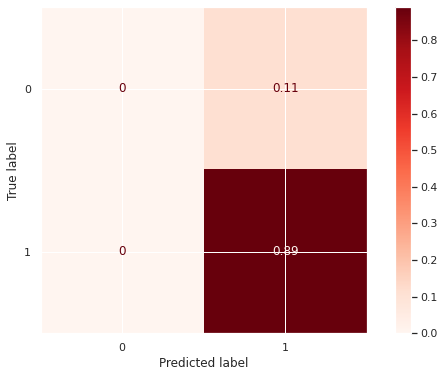

In [87]:
fig = plt.figure()
disp = plot_confusion_matrix(model_lr, X_test, y_test,
                            #  display_labels=['1','0'],
                             cmap=plt.cm.Reds, normalize = 'all'
                            )

In [57]:
#y_hat = model_lr.predict(X_test)
probs = model_lr.predict_proba(X_test)
probs.shape

(138182, 2)

In [58]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.933157,1,1
1,0.933157,1,1
2,0.657115,1,1
3,0.933157,1,1
4,0.933157,1,1


In [59]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 0, 1)
    prob_df["actual"] = list(y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN  = df_cm[0][0]
    FN  = df_cm[1][0]
    TP  = df_cm[1][1]
    FP  = df_cm[0][1]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [60]:
np.shape(sensitivities)
sensitivities

[1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0]

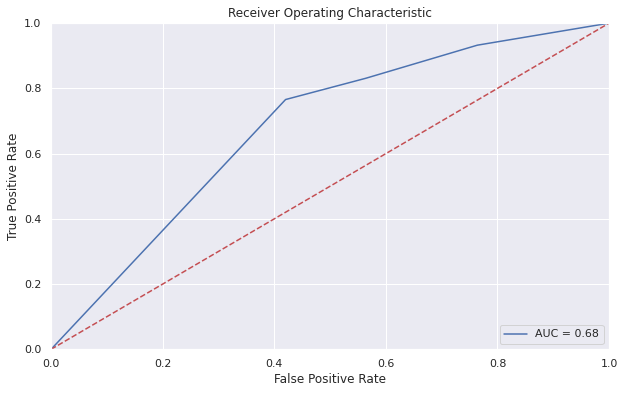

In [61]:
probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
!pip install scikit-plot

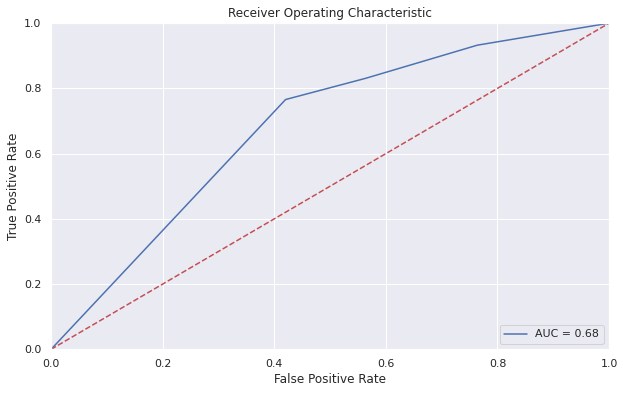

In [67]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

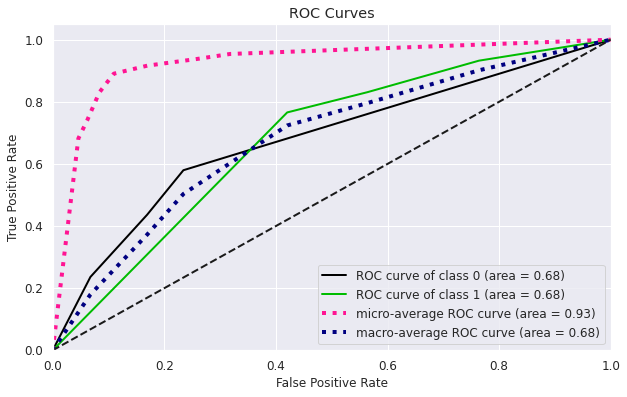

In [70]:
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, probs)
plt.show()

In [75]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_hat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(fbeta_score(y_test, y_hat, average='macro', beta=0.5))

Accuracy: 89.05%
0.45522513950525395


In [77]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)
# make predictions for test data
y_hat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(fbeta_score(y_test, y_hat, average='macro', beta=0.5))

Accuracy: 89.05%
0.45522513950525395


In [115]:
X = cormob_df[["HIPERTENSION", "DIABETES"]]
y = cormob_df['SURVIVED']

In [116]:
X=X.to_numpy()
y=y.to_numpy()

[[    0  5005]
 [    0 41056]]
[[    0  5005]
 [    0 41056]]
[[    0  5005]
 [    0 41056]]
[[    0  5005]
 [    0 41056]]
[[    0  5006]
 [    0 41055]]
[[    0  5005]
 [    0 41055]]
[[    0  5005]
 [    0 41055]]
[[    0  5005]
 [    0 41055]]
[[    0  5005]
 [    0 41055]]
[[    0  5005]
 [    0 41055]]
List of possible accuracy: [0.891339745120601, 0.891339745120601, 0.891339745120601, 0.891339745120601, 0.8913180347799657, 0.8913373860182371, 0.8913373860182371, 0.8913373860182371, 0.8913373860182371, 0.8913373860182371]

Maximum Accuracy That can be obtained from this model is: 89.13397451206009 %

Minimum Accuracy: 89.13180347799657 %

Overall Accuracy: 89.13363945353555 %

Standard Deviation is: 6.556603926520877e-06


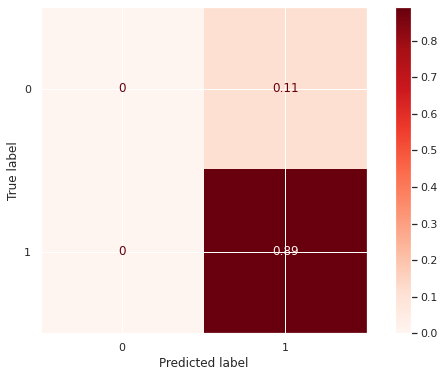

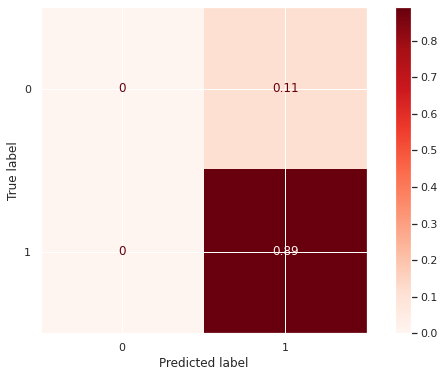

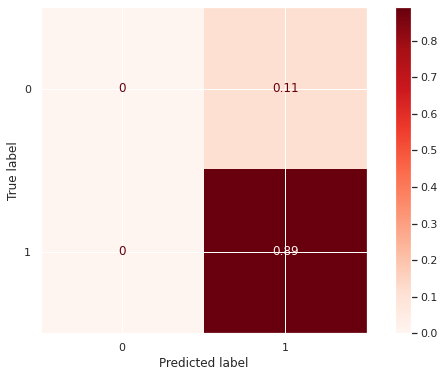

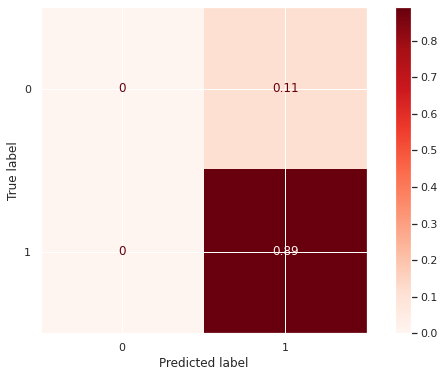

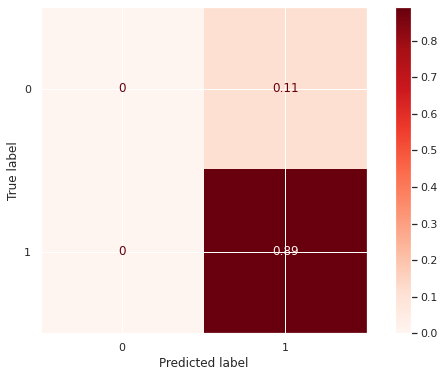

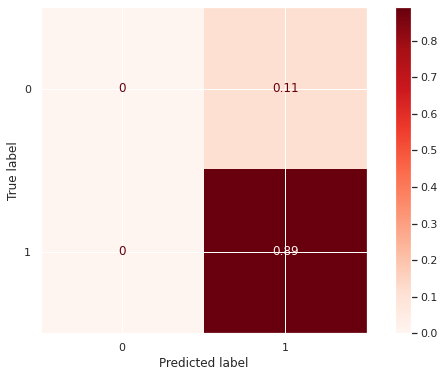

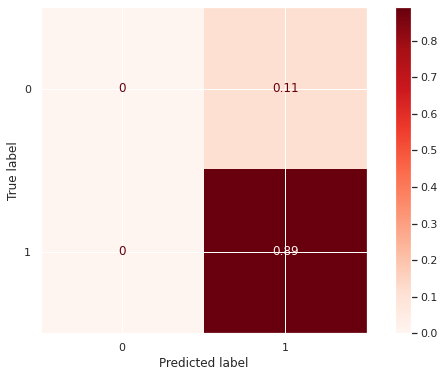

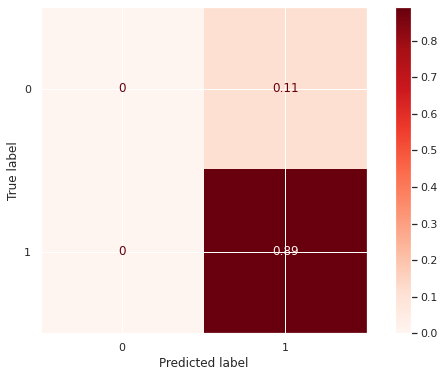

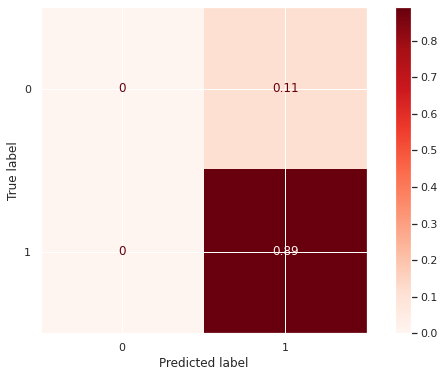

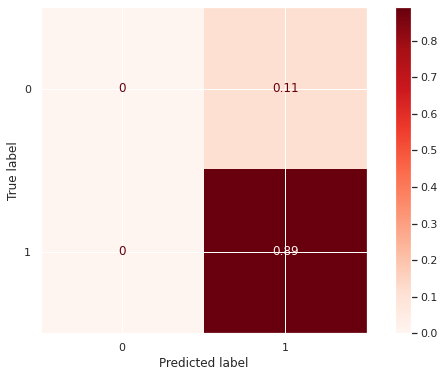

In [120]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model_lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model_lr.score(x_test_fold, y_test_fold))
    print( confusion_matrix(y_test_fold, model_lr.predict(x_test_fold)) )
    plot_confusion_matrix(model_lr, x_test_fold, y_test_fold,
                            #  display_labels=['1','0'],
                             cmap=plt.cm.Reds, normalize = 'all'
                            )
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))